In [2]:
import os
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cwd = os.getcwd()
%load_ext autoreload
%autoreload 2

In [3]:
from IPython.display import display
pd.options.display.max_columns = None

In [4]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.utils import inData as inData
from ExMAS.main import matching

In [5]:
KPIs = pd.read_csv('ExMAS/extras/PIPE_KPIs.csv', index_col = 0)
rides = pd.read_csv('ExMAS/extras/PIPE_rides.csv', index_col = 0)
rm = pd.read_csv('ExMAS/extras/PIPE_rm.csv', index_col = [0,1])

In [8]:
KPIs.obj = KPIs.obj.apply(lambda x: 'costs_user' if x == 'u_pax' else x)
KPIs.obj = KPIs.obj.apply(lambda x: 'costs_vehr' if x == 'u_veh' else x)

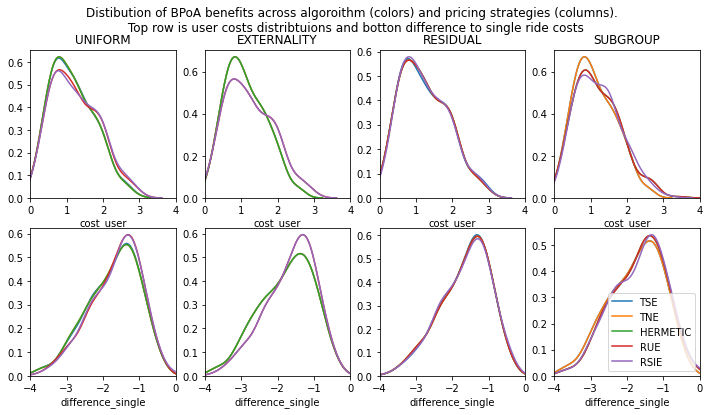

In [47]:
fig, ax = plt.subplots(2,4,figsize=(12,6))
rm['difference_single'] = rm['cost_user'] - rm['cost_single']

PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
for col in rm.columns:
    if '-' in col:
        for row, kpi in enumerate(['cost_user','difference_single']):
            
            PRICING, ALGO, _ , obj = col.split('-')
            if PRICING in PRICINGS:
                if obj == 'min':
                    j = PRICINGS.index(PRICING)
                    ax[0][j].set_title(PRICING)
                    sns.distplot(rm[rm[col] == 1][kpi],ax = ax[row][j], label = col.split('-')[1] if (j == 3) and (row == 1) else None, kde = True, hist = False) 
ax[0][1].set_xlim((0,4))
ax[0][2].set_xlim((0,4))
ax[0][3].set_xlim((0,4))
ax[0][0].set_xlim((0,4))
ax[1][1].set_xlim((-4,0))
ax[1][2].set_xlim((-4,0))
ax[1][3].set_xlim((-4,0))
ax[1][0].set_xlim((-4,0))
_ = fig.suptitle('Distibution of BPoA benefits across algoroithm (colors) and pricing strategies (columns). \n Top row is user costs distribtuions and botton difference to single ride costs')

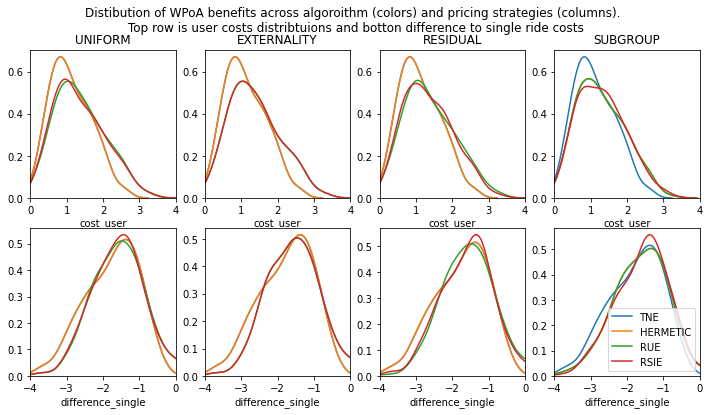

In [48]:
fig, ax = plt.subplots(2,4,figsize=(12,6))
rm['difference_single'] = rm['cost_user'] - rm['cost_single']

PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
for col in rm.columns:
    if '-' in col:
        for row, kpi in enumerate(['cost_user','difference_single']):
            
            PRICING, ALGO, _ , obj = col.split('-')
            if PRICING in PRICINGS:
                if obj == 'max':
                    j = PRICINGS.index(PRICING)
                    ax[0][j].set_title(PRICING)
                    sns.distplot(rm[rm[col] == 1][kpi],ax = ax[row][j], label = col.split('-')[1] if (j == 3) and (row == 1) else None, kde = True, hist = False) 
ax[0][1].set_xlim((0,4))
ax[0][2].set_xlim((0,4))
ax[0][3].set_xlim((0,4))
ax[0][0].set_xlim((0,4))
ax[1][1].set_xlim((-4,0))
ax[1][2].set_xlim((-4,0))
ax[1][3].set_xlim((-4,0))
ax[1][0].set_xlim((-4,0))
_ = fig.suptitle('Distibution of WPoA benefits across algoroithm (colors) and pricing strategies (columns). \n Top row is user costs distribtuions and botton difference to single ride costs')

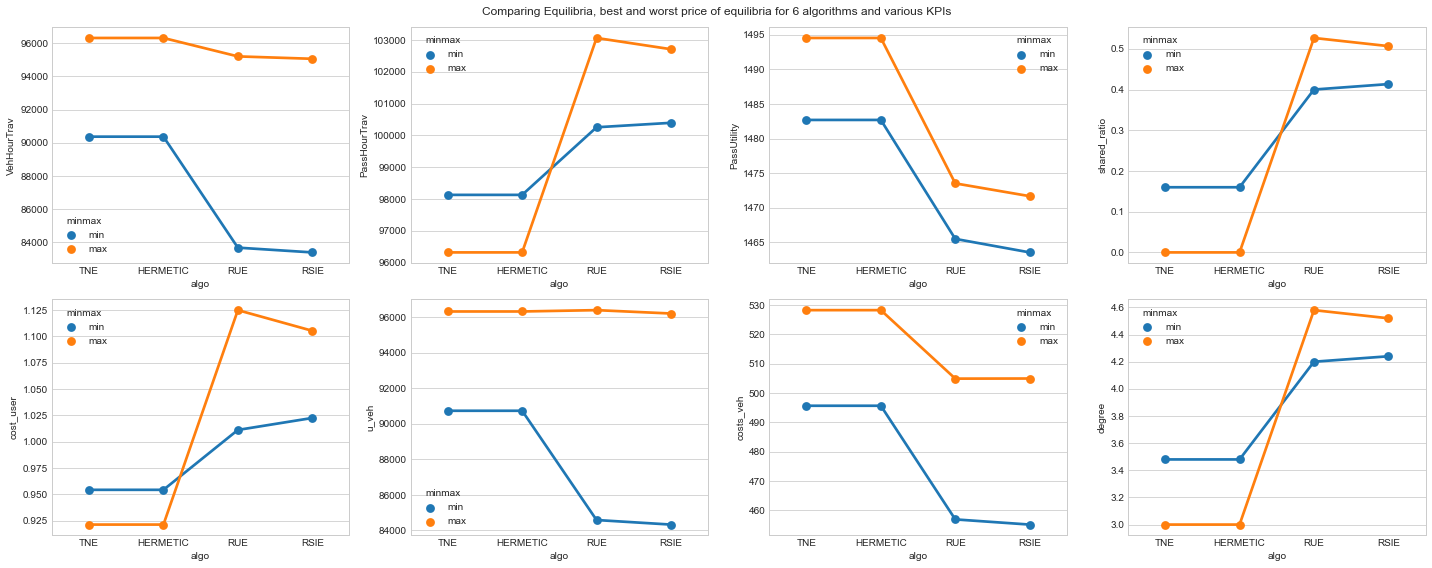

In [49]:
def plot_KPIs(pricing = 'UNIFORM'):
    plt.style.use('seaborn-whitegrid')
    KPIs = pd.read_csv('ExMAS/extras/PIPE_KPIs.csv', index_col = 0)
    KPIs = KPIs[~(KPIs.algo == 'TSE')]
    KPIs.obj = KPIs.obj.apply(lambda x: 'costs_user' if x == 'u_pax' else x)
    KPIs.obj = KPIs.obj.apply(lambda x: 'costs_veh' if x == 'u_veh' else x)
    to_plot = KPIs[KPIs.pricing == 'UNIFORM']
    fig, axes = plt.subplots(2,4,figsize = (20,8))
    axes = axes.flatten()
    sns.pointplot(y='VehHourTrav',x = 'algo', data = to_plot, ax = axes[0], hue = 'minmax')
    
    sns.pointplot(y='PassHourTrav',x = 'algo', data = to_plot, ax = axes[1], hue = 'minmax')
    sns.pointplot(y='PassUtility',x = 'algo', data = to_plot, ax = axes[2], hue = 'minmax')
    sns.pointplot(y='shared_ratio',x = 'algo', data = to_plot, ax = axes[3], hue = 'minmax')
    sns.pointplot(y='cost_user',x = 'algo', data = to_plot, ax = axes[4], hue = 'minmax')
    sns.pointplot(y='u_veh',x = 'algo', data = to_plot, ax = axes[5], hue = 'minmax')
    sns.pointplot(y='costs_veh',x = 'algo', data = to_plot, ax = axes[6], hue = 'minmax')
    sns.pointplot(y='degree',x = 'algo', data = to_plot, ax = axes[7], hue = 'minmax')
    fig.suptitle('Comparing Equilibria, best and worst price of equilibria for 6 algorithms and various KPIs')
    plt.tight_layout()
    

plot_KPIs()

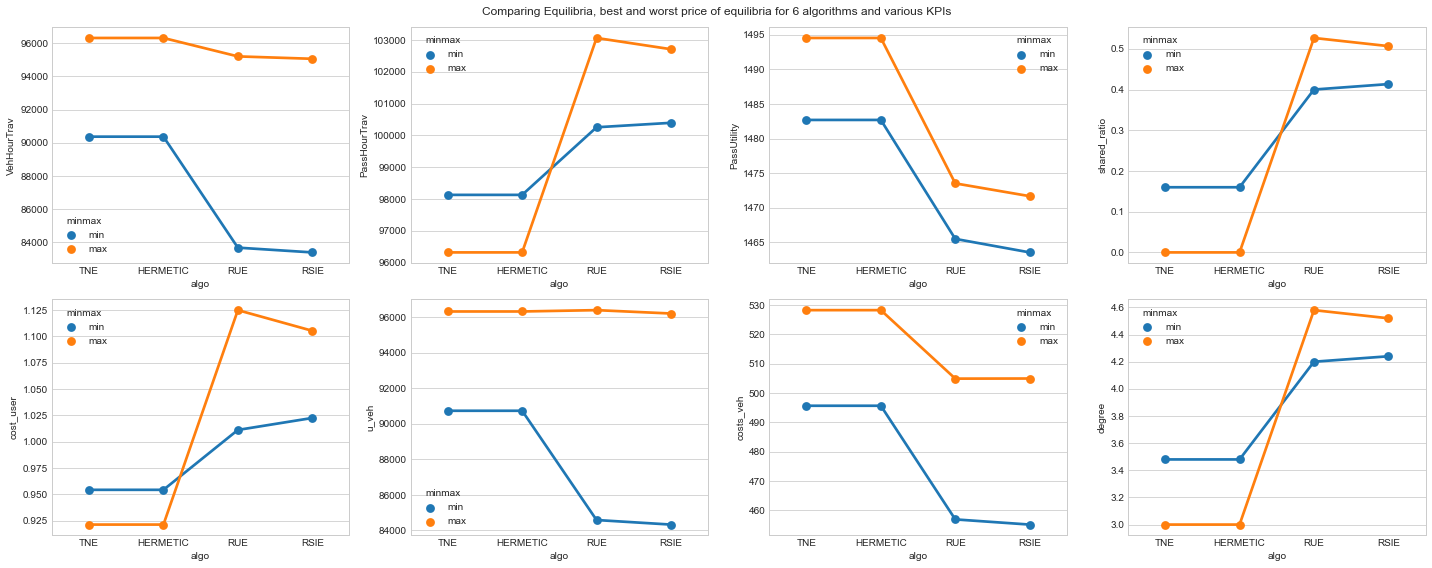

In [51]:
plot_KPIs(pricing = 'EXTERNALITY')

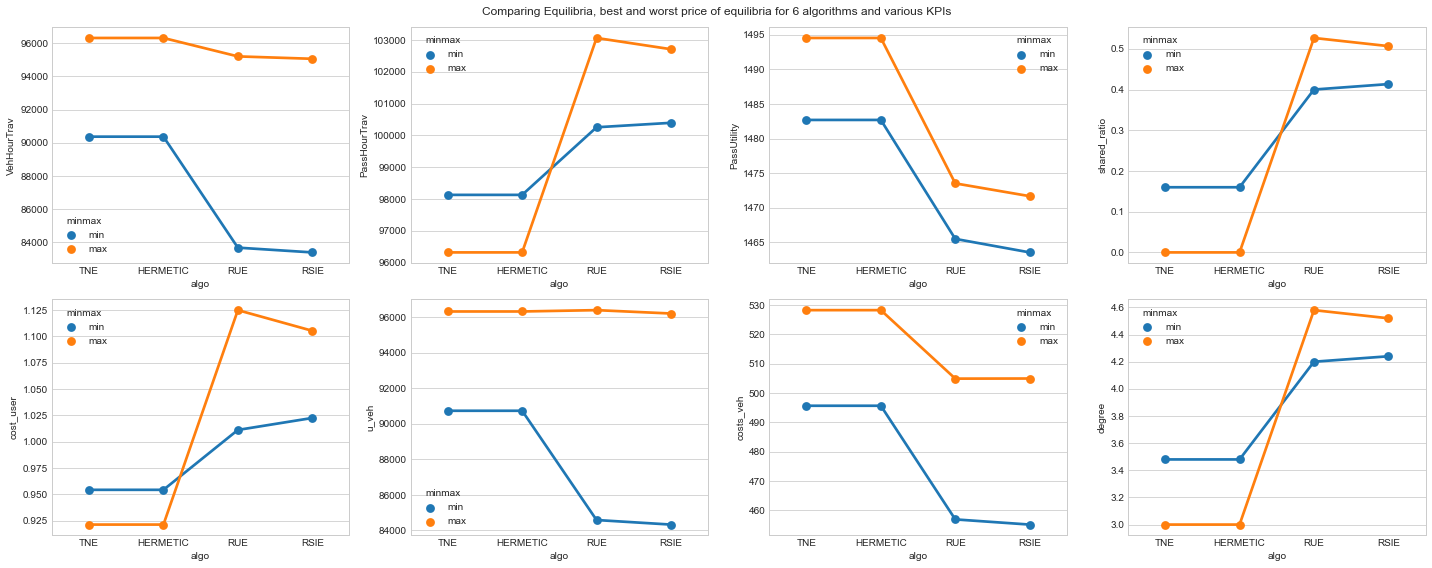

In [50]:
plot_KPIs(pricing = 'RESIDUAL')

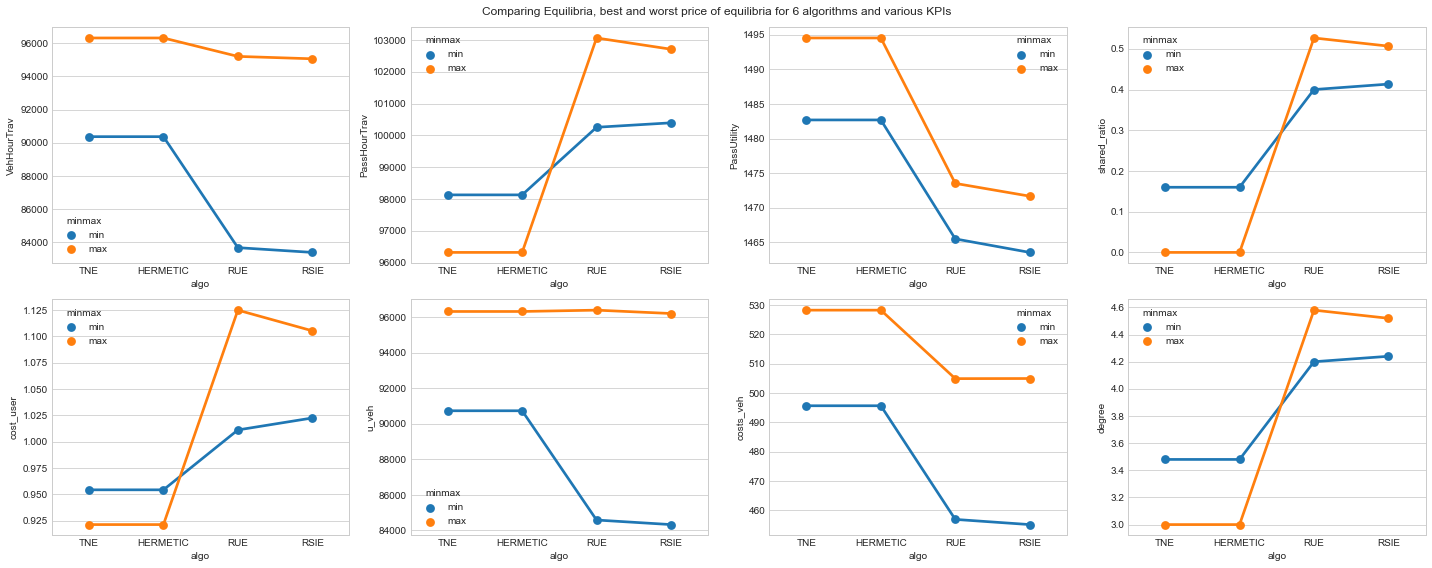

In [52]:
plot_KPIs(pricing = 'SUBGROUP')

---
(c) Rafał Kucharski, Delft, 2020